<a href="https://colab.research.google.com/github/luisgoni/ProjetoEstatistica_Mod_5/blob/main/Projeto_Estat%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Grupo📝
##João Varella,
##Sávio Murillo,
##Luciana Nunes,
##Cleverson Guandalin,
##Luis Gonigoni.

###Esboço do Projeto(Rubrica);

1) Entender o problema (objetivo)

2) Entender os dados (usar a estatística para isso)
- Descrever as colunas
- Tem dado faltante?
- Quantas colunas numéricas (quantitativas) e quantas categóricas (qualitativas)? Classifique
- Calcular média, mediana, desvio padrão, quartis, percentis, assimetria, moda, correlação
- Identificar os outliers
- Criar gráficos para fazer a visualização dos dados

3) Limpar os dados (preparar os dados)

**Objetivo**
O objetivo deste trabalho é mostrar quais são os jogos mais populares com base no Metacritic.

PS: São os jogos mais populares, não os melhores, ou seja: neste caso, o que define a popularidade de um jogo é a quantidade de avaliações, não a sua nota. 😉

**Sobre o conjunto de dados**

🎮O conjunto de dados contém todos os jogos apresentados no Metacritic.com de 1995 a janeiro de 2024. Inclui mais de 14.000 títulos de jogos exclusivos (first party) e em todas as plataformas (third party), também são jogos dos mais diversos gêneros🕹️

**Descrição das colunas**

Title: Qualitativa nominal

Release Date:

Developer: Qualitativa nominal

Publisher: Qualitativa nominal

Genres: Qualitativa ordinal

Product Rating: Qualitativa ordinal

User Score: Quantitativa contínua

User Ratings Count: Quantitativa discreta

Platforms Info: Qualitativa nominal

Total rating:	Quantitativa contínua

Release Year:

Ranking: Qualitativa ordinal

###Começando as analises dos Dados e seus respectivos procedimento 📈

In [3]:
# Importando bibliotecas utilizadas;
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats

In [4]:
# Carregando o Dataset
df = pd.read_csv('all_video_games.csv')
df.head()

,Title,Release Date,Developer,Publisher,Genres,Genres Splitted,Product Rating,User Score,User Ratings Count,Platforms Info
0,Ziggurat (2012),2/17/2012,Action Button Entertainment,Freshuu Inc.,Action,['Action'],NaN,6.9,14.0,"[{'Platform': 'iOS (iPhone/iPad)', 'Platform M..."
1,4X4 EVO 2,11/15/2001,Terminal Reality,Gathering,Auto Racing Sim,"['Auto', 'Racing', 'Sim']",Rated E For Everyone,NaN,NaN,"[{'Platform': 'Xbox', 'Platform Metascore': '5..."
2,MotoGP 2 (2001),1/22/2002,Namco,Namco,Auto Racing Sim,"['Auto', 'Racing', 'Sim']",Rated E For Everyone,5.8,NaN,"[{'Platform': 'PlayStation 2', 'Platform Metas..."
3,Gothic 3,11/14/2006,Piranha Bytes,Aspyr,Western RPG,"['Western', 'RPG']",Rated T For Teen,7.5,832.0,"[{'Platform': 'PC', 'Platform Metascore': '63'..."
4,Siege Survival: Gloria Victis,5/18/2021,FishTankStudio,Black Eye Games,RPG,['RPG'],NaN,6.5,10.0,"[{'Platform': 'PC', 'Platform Metascore': '69'..."


In [51]:
#Total de Linhas e colunas.
df.shape

(14055, 10)

In [5]:
#Contabilizando os dados faltantes nos Dados.
print(df.isnull().sum())

Title                   21
Release Date            64
Developer              138
Publisher              138
Genres                  21
Genres Splitted         21
Product Rating        3050
User Score            2341
User Ratings Count    2756
Platforms Info           0
dtype: int64


### Copiando os dados para não alterar o dado original.
* Alterando os nomes das colunas para melhor compreensão.

In [6]:
#Copiando oss dados para nao alterar o df original.
df_auxiliar = df.copy()

#Traduzido as colunas:
df_auxiliar= df.rename(columns={
    'Title': 'Título',
    'Release Date': 'Ano de Lançamento',
    'Developer': 'Desenvolvedor',
    'Publisher': 'Editora',
    'Genres': 'Gêneros',
    'Genres Splitted': 'Gêneros Separados',
    'Product Rating': 'Avaliação do Produto',
    'User Score': 'Pontuação do Usuário',
    'User Ratings Count': 'Número de Avaliações do Usuário',
    'Platforms Info': 'Informações das Plataformas'
})
df_auxiliar.columns

Index(['Título', 'Ano de Lançamento', 'Desenvolvedor', 'Editora', 'Gêneros',
       'Gêneros Separados', 'Avaliação do Produto', 'Pontuação do Usuário',
       'Número de Avaliações do Usuário', 'Informações das Plataformas'],
      dtype='object')

In [7]:
df_auxiliar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14055 entries, 0 to 14054
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Título                           14034 non-null  object 
 1   Ano de Lançamento                13991 non-null  object 
 2   Desenvolvedor                    13917 non-null  object 
 3   Editora                          13917 non-null  object 
 4   Gêneros                          14034 non-null  object 
 5   Gêneros Separados                14034 non-null  object 
 6   Avaliação do Produto             11005 non-null  object 
 7   Pontuação do Usuário             11714 non-null  float64
 8   Número de Avaliações do Usuário  11299 non-null  float64
 9   Informações das Plataformas      14055 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.1+ MB


In [8]:
#Observando qual medida utilizar para preencher os dados faltantes.
#Criando a variavel com o resultado.
Mean_Ptususario= df_auxiliar['Pontuação do Usuário'].mean()
Median_Ptusuario = df_auxiliar['Pontuação do Usuário'].median()
Mean_NumAvaUsuario = df_auxiliar['Número de Avaliações do Usuário'].mean()
Median_NumAvaUsuario = df_auxiliar['Número de Avaliações do Usuário'].median()

print('A media de pontuação do usuario é de:',round( Mean_Ptususario,2))
print('A Mediana da Pontuação do Usuario é de',round(Median_Ptusuario,2))
print('A Media de Numero de avaliações do usuario é de :',round(Mean_NumAvaUsuario,2))
print('A Mediana do Numero de avaliações do usuario é de :', round(Median_NumAvaUsuario,2))


A media de pontuação do usuario é de: 6.89
A Mediana da Pontuação do Usuario é de 7.2
A Media de Numero de avaliações do usuario é de : 245.64
A Mediana do Numero de avaliações do usuario é de : 34.0


### Podemos perceber que a alguns dados que iremos utilizar como metricas (importantes) faltando, com isso vamos preencher com a mediana dos dados....
* Retiramos os dados duplicados.

In [103]:
#Preenchendo valores nas colunas atraves da mediana.
numeric_columns = ['Pontuação do Usuário', 'Número de Avaliações do Usuário']
df_auxiliar[numeric_columns] = df_auxiliar[numeric_columns].fillna(df_auxiliar[numeric_columns].median())
df_auxiliar.head(10)

,Título,Ano de Lançamento,Desenvolvedor,Editora,Gêneros,Gêneros Separados,Avaliação do Produto,Pontuação do Usuário,Número de Avaliações do Usuário,Informações das Plataformas,Pontuaçaõ geral,Somente o ano de lancamento
0,Ziggurat (2012),2012-02-17,Action Button Entertainment,Freshuu Inc.,Action,['Action'],NaN,6.9,14.0,"[{'Platform': 'iOS (iPhone/iPad)', 'Platform M...",96.6,2012.0
1,4X4 EVO 2,2001-11-15,Terminal Reality,Gathering,Auto Racing Sim,"['Auto', 'Racing', 'Sim']",Rated E For Everyone,7.2,34.0,"[{'Platform': 'Xbox', 'Platform Metascore': '5...",244.8,2001.0
2,MotoGP 2 (2001),2002-01-22,Namco,Namco,Auto Racing Sim,"['Auto', 'Racing', 'Sim']",Rated E For Everyone,5.8,34.0,"[{'Platform': 'PlayStation 2', 'Platform Metas...",197.2,2002.0
3,Gothic 3,2006-11-14,Piranha Bytes,Aspyr,Western RPG,"['Western', 'RPG']",Rated T For Teen,7.5,832.0,"[{'Platform': 'PC', 'Platform Metascore': '63'...",6240.0,2006.0
4,Siege Survival: Gloria Victis,2021-05-18,FishTankStudio,Black Eye Games,RPG,['RPG'],NaN,6.5,10.0,"[{'Platform': 'PC', 'Platform Metascore': '69'...",65.0,2021.0
5,Guitar Hero III: Legends of Rock,2007-10-28,Neversoft Entertainment,RedOctane,Rhythm,['Rhythm'],Rated T For Teen,8.4,144.0,"[{'Platform': 'Wii', 'Platform Metascore': '86...",1209.6,2007.0
6,Frantix: A Puzzle Adventure,2005-09-19,Killer Game,Sony Online Entertainment,Action Puzzle,"['Action', 'Puzzle']",Rated E For Everyone,7.2,34.0,"[{'Platform': 'PSP', 'Platform Metascore': '59...",244.8,2005.0
7,Xenoraid,2016-11-08,10tons,10tons,Vertical Shoot-'Em-Up,"['Vertical', ""Shoot-'Em-Up""]",Rated E +10 For Everyone +10,6.2,6.0,"[{'Platform': 'PlayStation 4', 'Platform Metas...",37.2,2016.0
8,The Sims: Livin' Large,2000-08-27,Maxis,EA Games,Virtual Life,"['Virtual', 'Life']",Rated T For Teen,7.7,20.0,"[{'Platform': 'PC', 'Platform Metascore': '82'...",154.0,2000.0
9,Retrovirus,2012-11-16,Cadenza,Cadenza,FPS,['FPS'],NaN,6.6,20.0,"[{'Platform': 'PC', 'Platform Metascore': '70'...",132.0,2012.0


In [10]:
# Total dos Valores nulos em cada coluna;
print(df_auxiliar.isnull().sum())

Título                               21
Ano de Lançamento                    64
Desenvolvedor                       138
Editora                             138
Gêneros                              21
Gêneros Separados                    21
Avaliação do Produto               3050
Pontuação do Usuário                  0
Número de Avaliações do Usuário       0
Informações das Plataformas           0
dtype: int64


In [11]:
# Identificando e retirando valores duplicados
# df_auxiliar.duplicated().sum()
# df_auxiliar.drop_duplicates(inplace=True)
print(f'Total de dados dupicados {df_auxiliar.duplicated().sum()}')

Total de dados dupicados 20


### Definindo a Data como date time.

In [12]:
#Definindo o ano de lancamento como date time ;
df_auxiliar['Ano de Lançamento'] = pd.to_datetime(df_auxiliar['Ano de Lançamento'], format='%m/%d/%Y')
df_auxiliar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14055 entries, 0 to 14054
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Título                           14034 non-null  object        
 1   Ano de Lançamento                13991 non-null  datetime64[ns]
 2   Desenvolvedor                    13917 non-null  object        
 3   Editora                          13917 non-null  object        
 4   Gêneros                          14034 non-null  object        
 5   Gêneros Separados                14034 non-null  object        
 6   Avaliação do Produto             11005 non-null  object        
 7   Pontuação do Usuário             14055 non-null  float64       
 8   Número de Avaliações do Usuário  14055 non-null  float64       
 9   Informações das Plataformas      14055 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(7)
memory usage: 

### 🎯 Em certos casos, jogos populares podem ter uma pontuação de usuário baixa devido ao grande número de avaliações. Para mitigar isso, podemos calcular a classificação total, que é o produto da pontuação média e da contagem de classificações. Isso fornece uma medida mais abrangente do envolvimento do usuário com o jogo.
* Com isso criamos uma nova coluna para ter os dados de Pontuação Geral do Game.
* E ordenamos a tabela pontuação Geral por ordem decrescente.

In [13]:
#Criando uma nova coluna, com a pontuação resultante entre as 2 metricas.
df_auxiliar['Pontuaçaõ geral']=df_auxiliar['Pontuação do Usuário']*df_auxiliar['Número de Avaliações do Usuário']
df_auxiliar.head()

,Título,Ano de Lançamento,Desenvolvedor,Editora,Gêneros,Gêneros Separados,Avaliação do Produto,Pontuação do Usuário,Número de Avaliações do Usuário,Informações das Plataformas,Pontuaçaõ geral
0,Ziggurat (2012),2012-02-17,Action Button Entertainment,Freshuu Inc.,Action,['Action'],NaN,6.9,14.0,"[{'Platform': 'iOS (iPhone/iPad)', 'Platform M...",96.6
1,4X4 EVO 2,2001-11-15,Terminal Reality,Gathering,Auto Racing Sim,"['Auto', 'Racing', 'Sim']",Rated E For Everyone,7.2,34.0,"[{'Platform': 'Xbox', 'Platform Metascore': '5...",244.8
2,MotoGP 2 (2001),2002-01-22,Namco,Namco,Auto Racing Sim,"['Auto', 'Racing', 'Sim']",Rated E For Everyone,5.8,34.0,"[{'Platform': 'PlayStation 2', 'Platform Metas...",197.2
3,Gothic 3,2006-11-14,Piranha Bytes,Aspyr,Western RPG,"['Western', 'RPG']",Rated T For Teen,7.5,832.0,"[{'Platform': 'PC', 'Platform Metascore': '63'...",6240.0
4,Siege Survival: Gloria Victis,2021-05-18,FishTankStudio,Black Eye Games,RPG,['RPG'],NaN,6.5,10.0,"[{'Platform': 'PC', 'Platform Metascore': '69'...",65.0


In [54]:
#Percebendo o percentual dos dados  faltantes nos dados.
print(df_auxiliar.isnull().sum() / df_auxiliar.shape[0]*100)

Título                              0.149413
Ano de Lançamento                   0.455354
Desenvolvedor                       0.981857
Editora                             0.981857
Gêneros                             0.149413
Gêneros Separados                   0.149413
Avaliação do Produto               21.700462
Pontuação do Usuário                0.000000
Número de Avaliações do Usuário     0.000000
Informações das Plataformas         0.000000
Pontuaçaõ geral                     0.000000
Somente o ano de lancamento         0.000000
dtype: float64


In [38]:
# Criando coluna Somente do Ano de lançamento,para ficando mais fácil de criar metricas.
df_auxiliar['Somente o ano de lancamento ']=df_auxiliar['Ano de Lançamento'].dt.year
print(df.info())
#Preenchendo os valores ausentes nas datas com o dia de hoje;
df_auxiliar['Somente o ano de lancamento '].fillna(pd.to_datetime('today').date(), inplace=True)
df_auxiliar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14055 entries, 0 to 14054
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               14034 non-null  object 
 1   Release Date        13991 non-null  object 
 2   Developer           13917 non-null  object 
 3   Publisher           13917 non-null  object 
 4   Genres              14034 non-null  object 
 5   Genres Splitted     14034 non-null  object 
 6   Product Rating      11005 non-null  object 
 7   User Score          11714 non-null  float64
 8   User Ratings Count  11299 non-null  float64
 9   Platforms Info      14055 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14055 entries, 0 to 14054
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         

* **Ordenando a pontuação geral em ordem decrescente**

In [129]:
jogos_mais_populares =round(df_auxiliar.sort_values(by='Pontuaçaõ geral',ascending=False),2)
jogos_mais_populares.head(10)

,Título,Ano de Lançamento,Desenvolvedor,Editora,Gêneros,Gêneros Separados,Avaliação do Produto,Pontuação do Usuário,Número de Avaliações do Usuário,Informações das Plataformas,Pontuaçaõ geral,Somente o ano de lancamento
10941,The Last of Us Part II,2020-06-19,Naughty Dog,Sony Interactive Entertainment,Survival,['Survival'],Rated M For Mature,5.8,163419.0,"[{'Platform': 'PlayStation 4', 'Platform Metas...",947830.2,2020.0
13678,Cyberpunk 2077,2020-12-10,CD Projekt Red Studio,CD Projekt Red Studio,Action RPG,"['Action', 'RPG']",Rated M For Mature,7.1,35194.0,"[{'Platform': 'PC', 'Platform Metascore': '86'...",249877.4,2020.0
7377,God of War,2018-04-20,SCE Santa Monica,Sony Interactive Entertainment,Linear Action Adventure,"['Linear', 'Action', 'Adventure']",Rated M For Mature,9.1,24855.0,"[{'Platform': 'PlayStation 4', 'Platform Metas...",226180.5,2018.0
7591,Red Dead Redemption 2,2018-10-26,Rockstar Games,Rockstar Games,Open-World Action,"['Open-World', 'Action']",Rated M For Mature,8.8,23875.0,"[{'Platform': 'Xbox One', 'Platform Metascore'...",210100.0,2018.0
13391,Ghost of Tsushima,2020-07-17,Sucker Punch,Sony Interactive Entertainment,Open-World Action,"['Open-World', 'Action']",Rated M For Mature,9.1,21863.0,"[{'Platform': 'PlayStation 4', 'Platform Metas...",198953.3,2020.0
6075,The Legend of Zelda: Breath of the Wild,2017-03-03,Nintendo,Nintendo,Open-World Action,"['Open-World', 'Action']",Rated E +10 For Everyone +10,8.8,22216.0,"[{'Platform': 'Wii U', 'Platform Metascore': '...",195500.8,2017.0
2930,The Last of Us Remastered,2014-07-29,Naughty Dog,SCEA,Linear Action Adventure,"['Linear', 'Action', 'Adventure']",Rated M For Mature,9.2,20141.0,"[{'Platform': 'PlayStation 4', 'Platform Metas...",185297.2,2014.0
7612,The Witcher 3: Wild Hunt,2015-05-19,CD Projekt Red Studio,Warner Bros. Interactive Entertainment,Action RPG,"['Action', 'RPG']",Rated M For Mature,9.2,19581.0,"[{'Platform': 'PC', 'Platform Metascore': '93'...",180145.2,2015.0
3368,Uncharted 4: A Thief's End,2016-05-10,Naughty Dog,Sony Interactive Entertainment,Linear Action Adventure,"['Linear', 'Action', 'Adventure']",Rated T For Teen,8.8,17412.0,"[{'Platform': 'PlayStation 4', 'Platform Metas...",153225.6,2016.0
3212,Death Stranding,2019-11-08,Kojima Productions,Sony Interactive Entertainment,Open-World Action,"['Open-World', 'Action']",Rated M For Mature,7.4,18746.0,"[{'Platform': 'PlayStation 4', 'Platform Metas...",138720.4,2019.0


### Selecionando os top 10 melhores avaliados para descobrir a media de popularidade.

In [41]:
# Selecionar os top 10 jogos mais populares
top_10_jogos = jogos_mais_populares.head(10)

# Calcular a média da popularidade dos top 10 jogos
media_popularidade_top_10 = top_10_jogos['Pontuaçaõ geral'].mean()

# Arredondar a média da popularidade dos top 10 jogos para duas casas decimais
media_popularidade_arredondada = round(media_popularidade_top_10, 2)

print("A média de popularidade dos top 10 jogos é:", media_popularidade_arredondada)


A média de popularidade dos top 10 jogos é: 268583.06


In [146]:
top_10_jogos['Título']

10941                     The Last of Us Part II
13678                             Cyberpunk 2077
7377                                  God of War
7591                       Red Dead Redemption 2
13391                          Ghost of Tsushima
6075     The Legend of Zelda: Breath of the Wild
2930                   The Last of Us Remastered
7612                    The Witcher 3: Wild Hunt
3368                  Uncharted 4: A Thief's End
3212                             Death Stranding
Name: Título, dtype: object

### Nesse parametro pegamos a media da pontuação por titulos(Top10).

In [16]:
#Média de pontuacao geral por desenvolvedor;

mean_score_by_developer = df_auxiliar.groupby('Título')['Pontuaçaõ geral'].mean().sort_values(ascending=False)
print("Média da Pontuação Geral por titulo:")
print(mean_score_by_developer.head(10))

Média da Pontuação Geral por titulo:
Título
The Last of Us Part II                     947830.2
Cyberpunk 2077                             249877.4
God of War                                 226180.5
Red Dead Redemption 2                      210100.0
Ghost of Tsushima                          198953.3
The Legend of Zelda: Breath of the Wild    195500.8
The Last of Us Remastered                  185297.2
The Witcher 3: Wild Hunt                   180145.2
Uncharted 4: A Thief's End                 153225.6
Death Stranding                            138720.4
Name: Pontuaçaõ geral, dtype: float64


In [26]:
#Optamos tambem por saber qual e a correlação da Pontuação Geral, com Numero de avaliações do usuario e Pontuaçao do usuario.
correlation_with_score = df_auxiliar.corr()['Pontuaçaõ geral'].sort_values(ascending=False)
print("Correlação da Pontuação Geral com outras variáveis:\n")
print(correlation_with_score)

Correlação da Pontuação Geral com outras variáveis:

Pontuaçaõ geral                    1.000000
Número de Avaliações do Usuário    0.968042
Pontuação do Usuário               0.080783
Name: Pontuaçaõ geral, dtype: float64


<ipython-input-26-42c90d1b8a55>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_score = df_auxiliar.corr()['Pontuaçaõ geral'].sort_values(ascending=False)


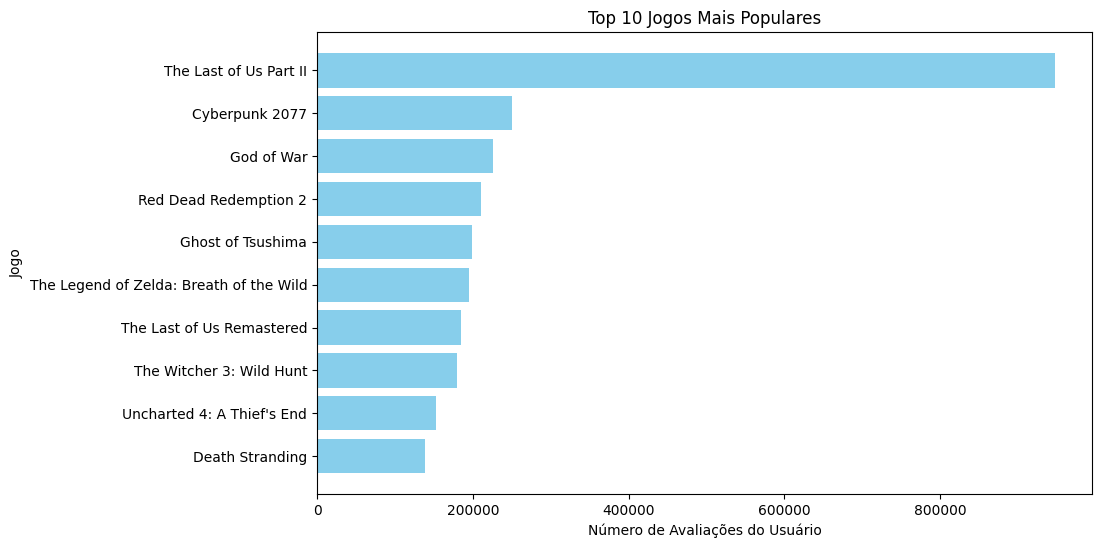

In [ ]:
dados_orga = df_auxiliar.sort_values(by='Pontuaçaõ geral', ascending=False)

# Selecionar os top 10 jogos mais populares
top_n_games = dados_orga.head(10)

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(top_n_games['Título'], top_n_games['Pontuaçaõ geral'], color='skyblue')
plt.xlabel('Número de Avaliações do Usuário')
plt.ylabel('Jogo')
plt.title('Top 10 Jogos Mais Populares')
plt.gca().invert_yaxis()  # Inverter o eixo y para que o jogo mais popular fique no topo
plt.show()

In [148]:
fig = px.scatter(top_10_jogos, x='Somente o ano de lancamento ', y='Pontuaçaõ geral', size='Pontuaçaõ geral', color='Título',title='Jogos mais populares',log_x=True, size_max=50)
fig.show(render='iframe')

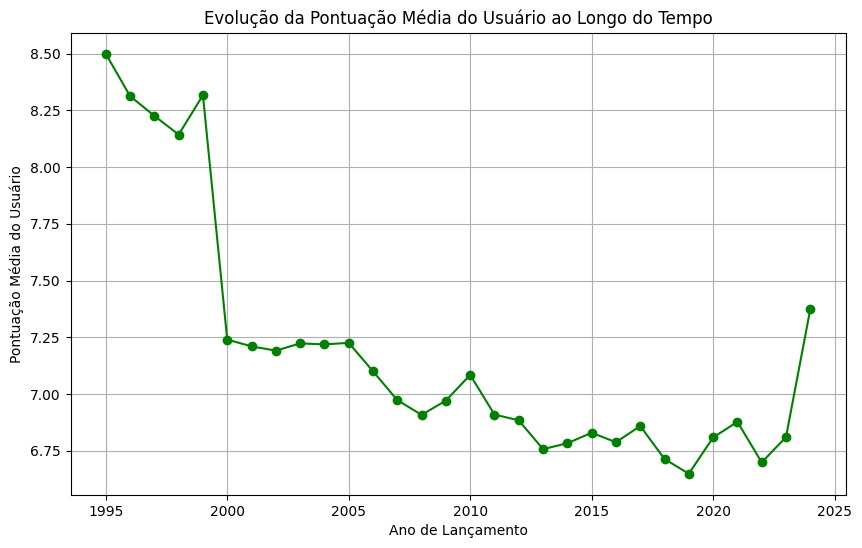

In [ ]:
plt.figure(figsize=(10, 6))
df_auxiliar.groupby(df_auxiliar['Ano de Lançamento'].dt.year)['Pontuação do Usuário'].mean().plot(marker='o', color='green')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Pontuação Média do Usuário')
plt.title('Evolução da Pontuação Média do Usuário ao Longo do Tempo')
plt.grid(True)
plt.show()

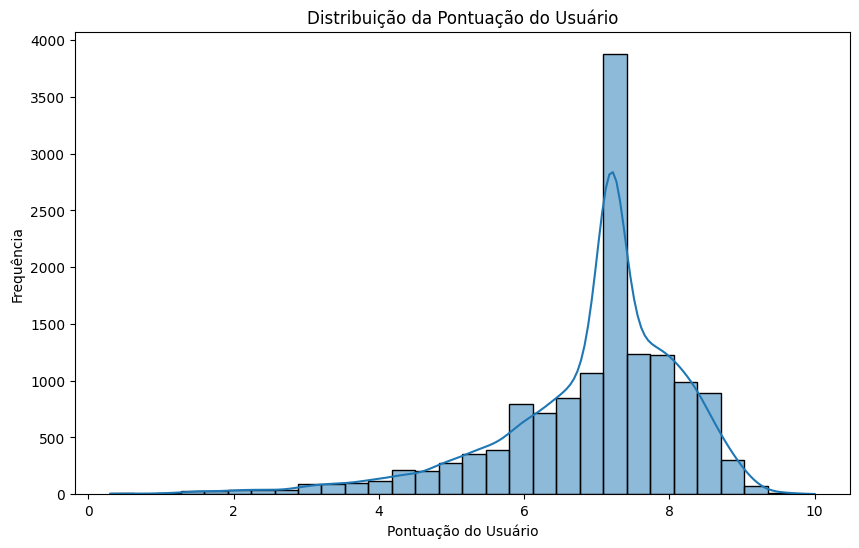

In [ ]:
# Histograma da pontuação do usuário
plt.figure(figsize=(10, 6))
sns.histplot(df_auxiliar['Pontuação do Usuário'], kde=True, bins=30)
plt.title('Distribuição da Pontuação do Usuário')
plt.xlabel('Pontuação do Usuário')
plt.ylabel('Frequência')
plt.show()

In [150]:
fig=px.bar(top_10_jogos,x='Título',y='Pontuaçaõ geral',color='Pontuaçaõ geral',title='Jogos mais populares')
fig.show(render='iframe')

**Conclusão sobre o jogo mais popular.**

🎮 Seria The last of us parte 2 um outlier? Ou realmente repercutiu a ponto de tantas pessoas fazerem questão de deixar sua avaliação (positiva ou negativa) em comparação com os outros?
Lembrando que Cyberpunk 2077 e God of War também foram jogos que causaram bastante repercussão, seja por expectativas criadas nos usuários ou decisões narrativas. Mas nenhum desses teve uma popularidade tão alta quanto TLOU parte 2. 🕹️

In [149]:
media_pontuacao_usuario = df_auxiliar['Pontuação do Usuário'].mean()
media_pontuacao_geral = df_auxiliar['Pontuaçaõ geral'].mean()

# Calculando a diferença entre as médias
diferenca_media = media_pontuacao_usuario - media_pontuacao_geral

# Imprimindo resultados
print("Média da Pontuação do Usuário:", media_pontuacao_usuario)
print("Média da Pontuação Geral:", media_pontuacao_geral)
print("Diferença entre as Médias:", diferenca_media)

# Conclusão
if diferenca_media > 0:
    print("Os usuários tendem a classificar os jogos mais positivamente do que a pontuação geral.")
elif diferenca_media < 0:
    print("Os usuários tendem a classificar os jogos mais negativamente do que a pontuação geral.")
else:
    print("As pontuações dos usuários e a pontuação geral estão alinhadas.")

Média da Pontuação do Usuário: 6.945677694770545
Média da Pontuação Geral: 1470.4633582355034
Diferença entre as Médias: -1463.517680540733
Os usuários tendem a classificar os jogos mais negativamente do que a pontuação geral.
